<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-the-background" data-toc-modified-id="Analyse-the-background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse the background</a></span></li></ul></div>

# Analyse the background

> In this section, we discuss prominent hypotheses that have been proposed to explain the EU referendum result and how we try to capture them in our empirical analysis. 

**we will look at four broad groups of variables:**

- EU exposure through immigration, trade and structural funds;

- local public service provision and fiscal consolidation;

- demography and education;

- economic structure, wages and unemployment.

In [8]:
from pandas.io.stata import StataReader, StataWriter
import pandas as pd

In [3]:
stata_data = StataReader("referendum data.dta", convert_categoricals=False)

In [4]:
data = stata_data.read()
varlist = stata_data.varlist
value_labels = stata_data.value_labels() 
fmtlist = stata_data.fmtlist
variable_labels = stata_data.variable_labels()

In [6]:
var = [i for i in variable_labels]
var_label = [variable_labels[i] for i in variable_labels]

df_labels = pd.DataFrame({"variable": var, "variable_label": var_label})

In [136]:
df_labels.head()# show labels of variables

,variable,variable_label
0,FinanceShareGrowth,Finance employment share change (2001-2011)
1,ind2001_Agriculture_sh,Agriculture employment share (2001)
2,ind2001_Finance_sh,Finance employment share (2001)
3,MigrantOldEUMemberGrowth,EU 15 migrant growth (2001-2011)
4,cc_2,country==N9


# Variable selection analysis

- Dependent variable(DV): we choose 'Pct_Remain' as our DV as it decide whether remain or leave
- Independent variable(IV): we choose 'Region', 'pensionergrowth20012011', 'ResidentAge60plusshare', 
    'median_hourly_pay2005', 'median_hourly_pay_growth', 'NONEU_2001Migrantshare', 'NONEU_Migrantgrowth', 
    'unqualifiedsharechange', 'umemployment_rate_aps', 'Total_EconomyEU_dependence', 'TotalImpactFLWAAYR', 'eufundspercapitapayment13'
- Four types of IV:
    - **EU exposure through immigration**('NONEU_2001Migrantshare', 'NONEU_Migrantgrowth'), **trade and structural funds**('eufundspercapitapayment13');
    - **Fiscal consolidation**('TotalImpactFLWAAYR');
    - **demography**('Region', 'pensionergrowth20012011', 'ResidentAge60plusshare', 'unqualifiedsharechange');
    - **economic structure**('Total_EconomyEU_dependence'), **wages**('median_hourly_pay2005', 'median_hourly_pay_growth') and **unemployment**('umemployment_rate_aps').

In [16]:
IVs = ['Region', 'pensionergrowth20012011', 'ResidentAge60plusshare', 'median_hourly_pay2005', 'median_hourly_pay_growth', 'NONEU_2001Migrantshare', 'NONEU_Migrantgrowth', 'unqualifiedsharechange', 'umemployment_rate_aps', 'Total_EconomyEU_dependence', 'TotalImpactFLWAAYR', 'eufundspercapitapayment13']

In [12]:
df1 = pd.read_stata("referendum data.dta")

df1 = df1.set_index("id")

In [13]:
df1.shape

(382, 109)

In [28]:
drop_list = list(set(var) - set(IVs) - {"id"} - {"Pct_Remain"})

In [29]:
df = df1.drop(drop_list, axis = 1)

In [32]:
df = df.dropna()
df.describe()

,Pct_Remain,pensionergrowth20012011,ResidentAge60plusshare,median_hourly_pay2005,median_hourly_pay_growth,NONEU_2001Migrantshare,NONEU_Migrantgrowth,unqualifiedsharechange,umemployment_rate_aps,Total_EconomyEU_dependence,TotalImpactFLWAAYR,eufundspercapitapayment13
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,46.966158,0.180561,0.214466,10.995967,0.235171,0.052506,0.023394,0.021195,5.262125,0.097106,448.651226,46.990948
std,10.246911,0.101058,0.036268,1.921793,0.085651,0.063465,0.029655,0.029419,2.107820,0.031786,121.909661,96.702225
min,27.300000,-0.137270,0.122608,7.680000,-0.091790,0.006623,-0.021239,-0.042495,1.600000,0.033000,241.000000,0.991317
25%,39.710000,0.115102,0.193885,9.605000,0.177558,0.018816,0.005813,0.002551,3.600000,0.081000,340.000000,8.283566
50%,45.760000,0.184524,0.211716,10.540000,0.233240,0.031101,0.011511,0.017860,4.900000,0.095000,436.000000,14.442414
75%,52.620000,0.253930,0.231754,12.070000,0.288235,0.052781,0.030065,0.035018,6.700000,0.130000,536.500000,38.002274
max,78.620000,0.439829,0.360392,21.680000,0.661098,0.381620,0.179379,0.146066,12.100000,0.147000,914.000000,829.705139


In [46]:
df.shape

(367, 13)

## Encode the region

In [135]:
# import warnings
# warnings.filterwarnings("ignore",category=DeprecationWarning)

# Next, we use LabelEncoder().fit_transform to transform Region into norminal variable
from sklearn.preprocessing import LabelEncoder
df['Region'] = LabelEncoder().fit_transform(df['Region'])

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
df.describe()

,Region,Pct_Remain,pensionergrowth20012011,ResidentAge60plusshare,median_hourly_pay2005,median_hourly_pay_growth,NONEU_2001Migrantshare,NONEU_Migrantgrowth,unqualifiedsharechange,umemployment_rate_aps,Total_EconomyEU_dependence,TotalImpactFLWAAYR,eufundspercapitapayment13
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4.727520,46.966158,0.180561,0.214466,10.995967,0.235171,0.052506,0.023394,0.021195,5.262125,0.097106,448.651226,46.990948
std,3.073219,10.246911,0.101058,0.036268,1.921793,0.085651,0.063465,0.029655,0.029419,2.107820,0.031786,121.909661,96.702225
min,0.000000,27.300000,-0.137270,0.122608,7.680000,-0.091790,0.006623,-0.021239,-0.042495,1.600000,0.033000,241.000000,0.991317
25%,2.000000,39.710000,0.115102,0.193885,9.605000,0.177558,0.018816,0.005813,0.002551,3.600000,0.081000,340.000000,8.283566
50%,5.000000,45.760000,0.184524,0.211716,10.540000,0.233240,0.031101,0.011511,0.017860,4.900000,0.095000,436.000000,14.442414
75%,7.000000,52.620000,0.253930,0.231754,12.070000,0.288235,0.052781,0.030065,0.035018,6.700000,0.130000,536.500000,38.002274
max,10.000000,78.620000,0.439829,0.360392,21.680000,0.661098,0.381620,0.179379,0.146066,12.100000,0.147000,914.000000,829.705139


In [88]:
Y = pd.DataFrame(df['Pct_Remain'])
x = df.drop('Pct_Remain', axis = 1)

In [37]:
x.head()

,Region,pensionergrowth20012011,ResidentAge60plusshare,median_hourly_pay2005,median_hourly_pay_growth,NONEU_2001Migrantshare,NONEU_Migrantgrowth,unqualifiedsharechange,umemployment_rate_aps,Total_EconomyEU_dependence,TotalImpactFLWAAYR,eufundspercapitapayment13
id,,,,,,,,,,,,
70.0,3,0.125610,0.214906,9.27,0.341963,0.011940,0.005496,-0.004097,10.1,0.088,712.0,84.278999
71.0,3,0.067761,0.195996,8.58,0.377622,0.032650,0.030981,0.015263,12.1,0.088,717.0,68.096825
72.0,3,0.143282,0.224830,10.77,0.159703,0.012858,-0.001488,-0.022780,8.3,0.088,618.0,68.096825
73.0,3,0.182932,0.197110,10.60,0.194340,0.021843,0.013794,0.000170,6.8,0.088,538.0,84.278999
74.0,3,0.153059,0.222705,9.05,0.353591,0.020575,0.007962,0.018478,6.6,0.088,546.0,99.542854


## Standardise the X - varibales

In [38]:
# We see that magnitude of our variables are different, we need to standardise the X - variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

x_scaled_df = pd.DataFrame({x.columns[i]: scaled_x[:,i] for i in range(12)})

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [53]:
x_scaled_df.head()

,NONEU_2001Migrantshare,NONEU_Migrantgrowth,Region,ResidentAge60plusshare,TotalImpactFLWAAYR,Total_EconomyEU_dependence,eufundspercapitapayment13,median_hourly_pay2005,median_hourly_pay_growth,pensionergrowth20012011,umemployment_rate_aps,unqualifiedsharechange
0,-0.640064,-0.604355,-0.562888,0.012128,2.163145,-0.286874,0.386123,-0.899329,1.248533,-0.544493,2.298336,-0.860898
1,-0.313295,0.256225,-0.562888,-0.509981,2.204215,-0.286874,0.218554,-1.258859,1.665432,-1.117712,3.248479,-0.201904
2,-0.625572,-0.840178,-0.562888,0.286134,1.391030,-0.286874,0.218554,-0.117742,-0.882321,-0.369390,1.443208,-1.496834
3,-0.483806,-0.324143,-0.562888,-0.479214,0.733910,-0.286874,0.386123,-0.206322,-0.477374,0.023501,0.730600,-0.715658
4,-0.503819,-0.521078,-0.562888,0.227468,0.799622,-0.286874,0.544182,-1.013962,1.384477,-0.272511,0.635586,-0.092473


## Split data into train set and test set

In [91]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
seed = 2019
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled_df, y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(293, 12)
(74, 12)
(293,)
(74,)


## Train Model

In [147]:
# Import a range of sklearn functions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

### Fit an OLS linear model to the x and y

In [129]:
#Fit an OLS model to the data
reg_OLS = LinearRegression(normalize=True).fit(X_train, Y_train)
coef = pd.Series(reg_OLS.coef_, index = x_scaled_df.columns)
print(coef)

NONEU_2001Migrantshare        7.047801
NONEU_Migrantgrowth          -0.473036
Region                        0.642358
ResidentAge60plusshare        0.535454
TotalImpactFLWAAYR           -3.356162
Total_EconomyEU_dependence   -2.773778
eufundspercapitapayment13     0.709904
median_hourly_pay2005         1.788873
median_hourly_pay_growth      1.945477
pensionergrowth20012011      -1.524256
umemployment_rate_aps        -1.370506
unqualifiedsharechange       -3.774775
dtype: float64


### Fit a Lasso model  - A Regularization Technique
Remember you now need to specify alpha the penalty parameter.
Try different alpha parameters.
What happens to the number of zero coefficients?
Retrieve and print the coefficient estimates in each case.

In [64]:
def Lasso_with_assigned_alpha(alpha=1, index=x_scaled_df.columns):
    """
    Input: appha, number; index, IV names
    Output: print coef
    """
    reg1 = Lasso(alpha=alpha).fit(X_train, Y_train)
    coef = pd.Series(reg1.coef_, index = index)
    print("With alpha: {}\n".format(alpha)+str(coef)+"\n")

In [65]:
for i in [0.01, 0.1, 1]:
    Lasso_with_assigned_alpha(i, x_scaled_df.columns)

With alpha: 0.01
NONEU_2001Migrantshare        6.959904
NONEU_Migrantgrowth          -0.452187
Region                        0.635867
ResidentAge60plusshare        0.503076
TotalImpactFLWAAYR           -3.334718
Total_EconomyEU_dependence   -2.785799
eufundspercapitapayment13     0.689491
median_hourly_pay2005         1.782965
median_hourly_pay_growth      1.925178
pensionergrowth20012011      -1.507837
umemployment_rate_aps        -1.354238
unqualifiedsharechange       -3.724222
dtype: float64

With alpha: 0.1
NONEU_2001Migrantshare        6.158324
NONEU_Migrantgrowth          -0.252487
Region                        0.577738
ResidentAge60plusshare        0.213824
TotalImpactFLWAAYR           -3.133416
Total_EconomyEU_dependence   -2.895097
eufundspercapitapayment13     0.504896
median_hourly_pay2005         1.735072
median_hourly_pay_growth      1.743099
pensionergrowth20012011      -1.355526
umemployment_rate_aps        -1.211112
unqualifiedsharechange       -3.269024
dtype: float64


### Use a bar chart to show the coefficient estimates

Text(0.5, 1.0, 'Feature importance using Lasso Model (alpha=1)')

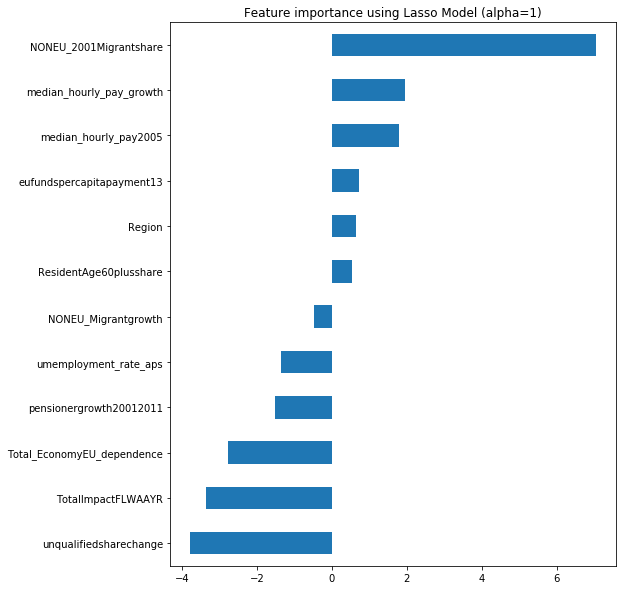

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model (alpha=1)")

LassoCV can be used to iteratively fit the alpha parameter. Try running this now and printing out the coeffs

In [140]:
reg_LassoCV = LassoCV(normalize=True)
reg_LassoCV.fit(X_train,Y_train)

print("Best alpha using built-in LassoCV: %f" % reg_LassoCV.alpha_)
print("Best score using built-in LassoCV: %f" %reg_LassoCV.score(X_train,Y_train))
coef = pd.Series(reg_LassoCV.coef_, index = x_scaled_df.columns)
print(coef)

Best alpha using built-in LassoCV: 0.006655
Best score using built-in LassoCV: 0.563326
NONEU_2001Migrantshare        6.002877
NONEU_Migrantgrowth          -0.202225
Region                        0.568832
ResidentAge60plusshare        0.166447
TotalImpactFLWAAYR           -3.092683
Total_EconomyEU_dependence   -2.908242
eufundspercapitapayment13     0.490290
median_hourly_pay2005         1.745037
median_hourly_pay_growth      1.722847
pensionergrowth20012011      -1.323900
umemployment_rate_aps        -1.188859
unqualifiedsharechange       -3.182339
dtype: float64


/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

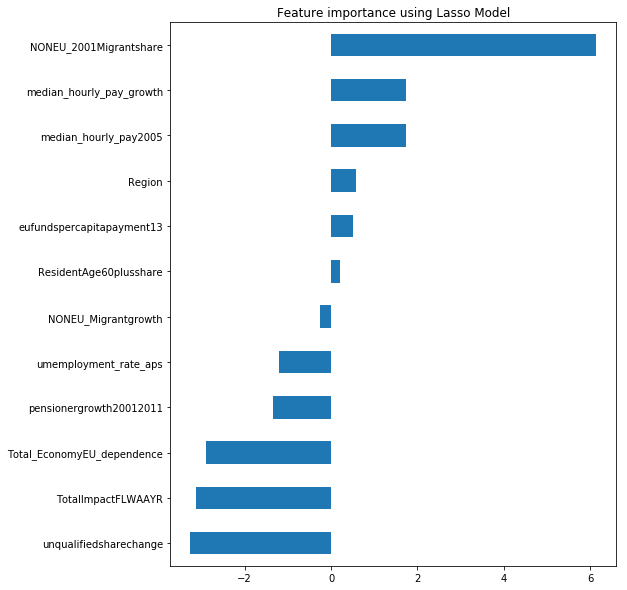

In [74]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# View accuracy of the model

In [114]:
from sklearn.metrics import *
def predict( model, X_test = X_test, Y_test = Y_test):
    """
    Input: trained model, test_IVs(X) and test_DV(Y)
    Output: accuracy of the model
    """
    Y_test_0_1 = [0 if i<50 else 1 for i in Y_test]
    y_pred = model.predict(X_test)
    predictions = [0 if i<50 else 1 for i in y_pred]
    accuracy = accuracy_score(Y_test_0_1, predictions)
    confusion_matrix1 = confusion_matrix(Y_test_0_1, predictions)
    print(model)
    print("Confusion matrix:\n"+str(confusion_matrix1))
    return ("Accuracy: %.2f%%" % (accuracy * 100.0))

In [130]:
predict(reg_OLS, X_test, Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Confusion matrix:
[[46  3]
 [ 5 20]]


'Accuracy: 89.19%'

In [132]:
predict(reg_LassoCV, X_test, Y_test)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
Confusion matrix:
[[46  3]
 [ 5 20]]


'Accuracy: 89.19%'

> We can see that regularized OLS gives same result as OLS model, mainly because we selecte 12 IVs (far more less than 367 observations) by observation or experience. Thus, the train model doesn't meet the overfitting problem.

# What if we choose all variables?

In [153]:
df1_all = df1.dropna()
Y_all = df1_all["Pct_Remain"]
X_all = df1_all.drop("Pct_Remain", axis = 1)
for i in X_all.columns:
    X_all[i] = LabelEncoder().fit_transform(X_all[i])#Label Encoder

scaler = StandardScaler().fit(X_all)
scaled_x = scaler.transform(X_all)
x_all_scaled_df = pd.DataFrame({X_all.columns[i]: scaled_x[:,i] for i in range(len(X_all.columns))})#standardise X

seed = 2019
test_size = 0.20
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(x_all_scaled_df, Y_all, test_size = test_size, random_state = seed)

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [154]:
print(X_train_all.shape)
print(X_test_all.shape)
print(Y_train_all.shape)
print(Y_test_all.shape)

(140, 108)
(36, 108)
(140,)
(36,)


In [155]:
reg_OLS_all = LinearRegression(normalize=True).fit(X_train_all, Y_train_all)
reg_LassoCV_all = LassoCV(normalize=True)
reg_LassoCV_all.fit(X_train_all,Y_train_all)

/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [156]:
predict(reg_OLS_all, X_test_all, Y_test_all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Confusion matrix:
[[20  4]
 [ 1 11]]


'Accuracy: 86.11%'

In [157]:
predict(reg_LassoCV_all, X_test_all, Y_test_all)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
Confusion matrix:
[[22  2]
 [ 0 12]]


'Accuracy: 94.44%'

> We can see that regularized OLS gives better prediction accuracy than OLS model, mainly because we selecte all 108 IVs (nearly equals 140, the number of train sets). Thus, the trained model meet the overfitting problem, and LASSO solve it well.

# Let's try more models

In [161]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
#from xgboost import XGBRegressor


estimator_list = [
    LinearRegression(),
    Lasso(),
    LassoCV(),
    RidgeCV(),
    Ridge(),
    ElasticNet(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver='lbfgs'),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LinearSVR(),
    NuSVR(),
    SVR()
]

cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2, random_state=168)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy Std', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)

row_index = 0
for estimator in estimator_list:
    df.loc[row_index, 'Name'] = estimator.__class__.__name__
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    cv_results = cross_validate(estimator, X_train_all, Y_train_all, cv=cv_split)
    df.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    df.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    df.loc[row_index, 'Test Accuracy Std'] = cv_results['test_score'].std()
    df.loc[row_index, 'Comsumed Time'] = cv_results['fit_time'].mean()
    print(row_index, estimator.__class__.__name__)
    print(cv_results['test_score'])
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df

/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0 LinearRegression
[  0.60586148  -2.94847835   0.76984429  -0.58722803 -51.49659733
  -5.21526895]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


1 Lasso
[0.94538674 0.96101363 0.94477287 0.93715618 0.95417206 0.92479005]


/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

2 LassoCV
[0.94894893 0.96174355 0.95382157 0.95451822 0.97589139 0.94713203]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


3 RidgeCV
[0.90122927 0.91501896 0.93334728 0.91740094 0.96124478 0.91946573]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


4 Ridge
[0.89699583 0.93911091 0.91866985 0.91740094 0.9523429  0.90225606]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


5 ElasticNet
[0.87881367 0.89086629 0.94397921 0.92224053 0.93190493 0.92368317]
6 DecisionTreeRegressor
[0.96986426 0.98264715 0.98554955 0.94664271 0.9884612  0.94923494]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


7 GradientBoostingRegressor
[0.99468407 0.99631698 0.99558705 0.99644403 0.99735572 0.9897049 ]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


8 MLPRegressor
[0.5815555  0.3552558  0.59692541 0.17892085 0.72753285 0.67759471]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


9 AdaBoostRegressor
[0.98674887 0.9907229  0.99020066 0.98786683 0.99373593 0.98848129]
10 BaggingRegressor
[0.9895697  0.98538218 0.98457805 0.97871368 0.98169029 0.98109412]


/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

11 ExtraTreesRegressor
[0.97571711 0.97735929 0.97815199 0.95659092 0.9718284  0.94886118]
12 RandomForestRegressor
[0.98829969 0.98662961 0.96552013 0.97525272 0.99111818 0.98329232]


/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You 

13 LinearSVR
[0.25149092 0.5686581  0.65541335 0.52339509 0.64715327 0.59471965]
14 NuSVR
[0.20247539 0.29089669 0.31961431 0.30710948 0.30434936 0.31089947]
15 SVR
[0.36576898 0.34233935 0.36515657 0.38903672 0.349817   0.34495318]


/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy Std,Comsumed Time
7,GradientBoostingRegressor,"{'init': None, 'validation_fraction': 0.1, 'n_...",1,0.995015,0.00251164,0.104472
9,AdaBoostRegressor,"{'n_estimators': 50, 'learning_rate': 1.0, 'lo...",0.997418,0.989626,0.00227698,0.113758
10,BaggingRegressor,"{'n_estimators': 10, 'n_jobs': None, 'bootstra...",0.997092,0.983505,0.00350043,0.02784
12,RandomForestRegressor,"{'n_jobs': None, 'min_samples_leaf': 1, 'max_d...",0.996549,0.981685,0.00877923,0.027819
6,DecisionTreeRegressor,"{'min_samples_leaf': 1, 'max_depth': None, 'cr...",1,0.9704,0.0169232,0.00652659
11,ExtraTreesRegressor,"{'n_jobs': None, 'min_samples_leaf': 1, 'max_d...",1,0.968085,0.0112642,0.0207053
2,LassoCV,"{'tol': 0.0001, 'fit_intercept': True, 'positi...",0.979741,0.957009,0.0096423,0.29454
1,Lasso,"{'tol': 0.0001, 'fit_intercept': True, 'normal...",0.948198,0.944549,0.0116154,0.00356106
3,RidgeCV,"{'store_cv_values': False, 'gcv_mode': None, '...",0.990371,0.924618,0.0188659,0.164375
4,Ridge,"{'tol': 0.001, 'fit_intercept': True, 'normali...",0.996801,0.921129,0.0193916,0.0678032


> We can see that GradientBoostingRegressor gives the best result, which has 1 in train accuracy mean, while also gives highest score in test accuracy(0.995).

Furthermore, we can try XGBoosting model...